In [1]:
# !pip install orix
# Uncomment the above line when running the code file for the first time to ensure that your system has orix installed

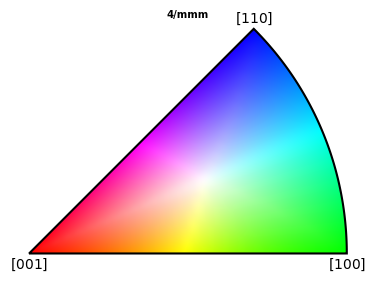

In [1]:
import tkinter as tk
from PIL import ImageTk, Image

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

from orix import plot, sampling
from orix.crystal_map import Phase
from orix.quaternion import Orientation, symmetry
from orix.vector import Vector3d

# Ensure that you have the above libraries installed else it will throw an error
# General suggestion is to try using '!pip install keyword' where keyword needs to be replaced with library name
# keyword can be matplotlib, numpy etc

# Changing parameters to change plots characteristics
new_params = {
    "figure.facecolor": 'w',    # changes background color of image
    "figure.figsize": (5, 3),   # changes figure size of image
    "lines.markersize": 0,      # changes size of marker
    "font.size": 6,             # changes font size
    "axes.grid": False,         # controls the visibility of grid lines in a plot
}
plt.rcParams.update(new_params)

plot.IPFColorKeyTSL(symmetry.D4h).plot()    # draws IPF color key D4h Schoenflies and 4/mmm Laue class
# please refer to orix documentation for other symmetries
# paste the below link on your browser to jump to orix documentation
# https://orix.readthedocs.io/en/stable/tutorials/inverse_pole_figures.html

plt.savefig('IPF.png')          # saves the IPF color key image for further use
# if you want to change image file name - change 'IPF.png' to 'XXXX.png' above where XXXX is the image file name
# if you want to save the image file to a different location then replace 'IPF.png' with the path above 

In [2]:
# Function to display the RGB value of the pixel under the cursor
def show_rgb_value(event):
    # Get the coordinates of the cursor on the canvas
    x = int(canvas.canvasx(event.x))
    y = int(canvas.canvasy(event.y))
    
    rgb = (-1, -1, -1, -1)  # Default RGB value
    
    # Check if the cursor is within the bounds of the image
    if 0 <= x < image1.width and 0 <= y < image1.height:
        # Get the RGB value of the pixel at the cursor position
        rgb = image1.getpixel((x, y))
        
        # Update the label with the RGB value
        rgb_label.config(text=f"RGB: ({rgb[0]:03d}, {rgb[1]:03d}, {rgb[2]:03d})")

# Create the root window
root = tk.Tk()
root.title("Microstructure Image RGB Value Viewer")

# Path to the first image
image_path1 = r"C:\Users\abhis\Pictures\Screenshots\Picture1.png"
image1 = Image.open(image_path1)
photo1 = ImageTk.PhotoImage(image1)

# Path to the second image
image_path = r"C:\Users\abhis\Downloads\IPF.png"
image = Image.open(image_path)
photo = ImageTk.PhotoImage(image)

# Determine the height and the difference in heights between the two images
if image1.height > image.height:
    h = image1.height
    diff = image1.height - image.height
else:
    h = image.height
    diff = 0

# Create a canvas to display the images
canvas = tk.Canvas(root, width=image1.width + image.width + 20, height=h)
canvas.grid(row=0, column=0, columnspan=2)

# Label to display the RGB value under the cursor
rgb_label = tk.Label(root, font=("Arial", 15), bg="white")
rgb_label.grid(row=1, column=0, columnspan=1, pady=2, padx=90)

# Label to display the coordinates of the point found
point_position = tk.Label(root, font=("Arial", 15), bg="white")
point_position.grid(row=6, column=1, columnspan=1, pady=10, padx=0)

# Labels and Entry widgets for specifying RGB values
l1 = tk.Label(root, text=" R ", font=("Arial", 12), bg="white")
l1.grid(row=1, column=1, sticky=tk.W, pady=2)
l2 = tk.Label(root, text=" G ", font=("Arial", 12), bg="white")
l2.grid(row=2, column=1, columnspan=1, sticky=tk.W, pady=2)
l3 = tk.Label(root, text=" B ", font=("Arial", 12), bg="white")
l3.grid(row=3, column=1, columnspan=1, sticky=tk.W, pady=8)

E1 = tk.Entry(root, bd=5)  # Entry widget for R value
E1.grid(row=1, column=1, columnspan=1)
E2 = tk.Entry(root, bd=5)  # Entry widget for G value
E2.grid(row=2, column=1)
E3 = tk.Entry(root, bd=5)  # Entry widget for B value
E3.grid(row=3, column=1)

# Function to process the image and find the specified RGB value
def process():
    # Get the width and height of the image
    width, height = image.size
    
    # Iterate over the pixels of the image
    for y in range(height):
        for x in range(width):
            # Get the RGB value of the current pixel
            rgb1 = image.getpixel((x, y))

            # Compare the RGB values with the specified values from the Entry widgets
            if rgb1 == (int(E1.get()), int(E2.get()), int(E3.get()), 255):
                canvas.delete("old_circle")  # Delete any existing circle on the canvas
                # Draw a circle to represent the cursor at the found coordinates (x, y)
                cursor = canvas.create_oval(0, 0, 1, 1, tags="old_circle")
                canvas.coords(cursor, x + image1.width + 20 - 3, y + diff - 3, x + image1.width + 20 + 3, y + diff + 3)
                point_position.config(text=f"Point Coordinates: ({x:03d}, {y:03d})")
                
                # Clear the Entry widgets
                E1.delete(0, tk.END)
                E2.delete(0, tk.END)
                E3.delete(0, tk.END)
                
                return (x, y)  # Found the point, return its coordinates

    return None  # Target RGB value not found in the image

# Button to initiate the process of finding the specified RGB value
B = tk.Button(root, text="Show Coordinate on IPF Color Key", command=process, bg='yellow')
B.grid(row=5, column=1, sticky=tk.W, padx=25)

# Bind the "<Motion>" event to the show_rgb_value function
canvas.bind("<Motion>", show_rgb_value)

# Create the first image on the canvas
canvas.create_image(0, 0, anchor=tk.NW, image=photo1)

# Create the second image on the canvas with the specified offset for y-coordinate
canvas.create_image(image1.width + 20, image1.height - image.height, anchor=tk.NW, image=photo)

# Starts the Tkinter event loop, enabling the GUI to function as expected and respond to user actions.
root.mainloop()
